# Webinar 3: Manipulating and Visualizing Data with Pandas

Last week, we discussed some of the types of questions that can be answered using a wide variety of data across different domains of expertise. This week, we will focus on analyzing two data sets - looking at men's and women's shoe prices. We'll ask research questions of the data, calculate group means, and look for correlations in the data. 

The [men's](https://data.world/datafiniti/mens-shoe-prices) and [women's](https://data.world/datafiniti/womens-shoe-prices) shoe's prices can be retrieved from [data.world](https://data.world).

### Import the Data

We'll start by importing numpy and pandas as their usual aliases.

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') #filter warnings

Let's import the first data set, `mens_shoe_prices.csv` as `mens`. If you try to import it normally, you will return an error because some of the data set's rows do not match the expected data types. 

If you specify `error_bad_lines = False` and `warn_bad_lines = True`, you will return a warning rather than an error. Thus, the data set will be imported without the bad lines instead of stopping the entire import procedure.

In [2]:
mens = pd.read_csv('data/mens_shoe_prices.csv', 
                   error_bad_lines = False, 
                   warn_bad_lines = True)

b'Skipping line 251: expected 48 fields, saw 49\nSkipping line 444: expected 48 fields, saw 50\nSkipping line 847: expected 48 fields, saw 49\nSkipping line 848: expected 48 fields, saw 49\nSkipping line 1018: expected 48 fields, saw 49\nSkipping line 1575: expected 48 fields, saw 51\nSkipping line 2133: expected 48 fields, saw 49\nSkipping line 2922: expected 48 fields, saw 51\nSkipping line 3777: expected 48 fields, saw 51\nSkipping line 4057: expected 48 fields, saw 49\nSkipping line 4239: expected 48 fields, saw 49\nSkipping line 4240: expected 48 fields, saw 49\nSkipping line 4384: expected 48 fields, saw 49\nSkipping line 4385: expected 48 fields, saw 49\nSkipping line 5388: expected 48 fields, saw 49\nSkipping line 5480: expected 48 fields, saw 49\nSkipping line 5481: expected 48 fields, saw 49\nSkipping line 5907: expected 48 fields, saw 50\nSkipping line 5908: expected 48 fields, saw 50\nSkipping line 6600: expected 48 fields, saw 49\nSkipping line 6601: expected 48 fields, sa

We can import the women's shoes data set in the same way, skipping all bad rows in the data set.

In [3]:
womens = pd.read_csv('data/womens_shoe_prices.csv', 
                     error_bad_lines = False, 
                     warn_bad_lines = True)

In [5]:
mens.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,vin,websiteIDs,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN


In [6]:
womens.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,websiteIDs,weight
0,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
1,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
2,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
3,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
4,AVpfEqFRLJeJML431x7w,NaN,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Brown,NaN,2016-11-16T12:56:36Z,2016-11-16T12:56:36Z,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,NaN,NaN,NaN,"8.5,7,7.5,8",NaN,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,7.63181E+11,NaN,NaN


### Merge the Data

What's in the data set? Let's explore both data set using the `.info()` method.

In [4]:
mens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19315 entries, 0 to 19314
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19315 non-null  object 
 1   asins                2571 non-null   object 
 2   brand                19057 non-null  object 
 3   categories           19315 non-null  object 
 4   colors               11013 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            19315 non-null  object 
 7   dateUpdated          19315 non-null  object 
 8   descriptions         9841 non-null   object 
 9   dimension            2991 non-null   object 
 10  ean                  9963 non-null   float64
 11  features             13925 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            18271 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 19315 non-null 

In [7]:
womens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19045 entries, 0 to 19044
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19045 non-null  object 
 1   asins                2208 non-null   object 
 2   brand                18412 non-null  object 
 3   categories           19045 non-null  object 
 4   colors               11889 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            19045 non-null  object 
 7   dateUpdated          19045 non-null  object 
 8   descriptions         10780 non-null  object 
 9   dimension            2418 non-null   object 
 10  ean                  9816 non-null   float64
 11  features             14108 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            17840 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 19045 non-null 

Ultimately, we would like to merge these two data sets in order to compare shoe prices directly. However, the men's shoes dataframe has 1 more column than the women's shoes frame. We also don't know if the remaining 47 columns are identical. 

Let's figure out which column(s) differ using Python set operations. 

In [8]:
mens_cols = set(mens.columns) # set is like a list or tuple with no repeated values
womens_cols = set(womens.columns)

mens_cols.difference(womens_cols)# give columns that aren't present in both

{'vin'}

The `vin` column is not available in the women's data set, and all other columns are identical. Let's drop the column from `mens` using the `.drop()` method.

In [9]:
mens = mens.drop('vin', axis = 'columns') #dropping vin column from mens dataframe

We're going to combine the dataframes into one frame with all shoe prices using `pd.concat()`. This method can be used to append/union or merge data sets together with new columns. We'll be appending/unioning the data, adding new _rows_ to the frame.

But how do we identify the original records as men's or women's? `pd.concat()` has a `keys` argument, where can you specify a second key corresponding to each original data set. 

However, we will be using the men's/women's shoe identifier to group our data later on. Thus, we'll create a new column in each data set identifying them as men's (M) or women's (F) shoes.

In [10]:
# Create new column, 'Type', to identify shoes as M or W
mens['Type'] = 'M'
womens['Type'] = 'W'

We can then easily append the two data sets. The default method of `pd.concat()` is to add new rows.

In [11]:
shoes = pd.concat([mens, womens]) #data is merged with one on top of the other

In [12]:
shoes.head(5)

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,websiteIDs,weight,Type
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036.0,NaN,NaN,M
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036.0,NaN,NaN,M
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,M
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,M
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,M


How useful are all of the columns in our data set? Let's re-check the information about our data set.

In [13]:
shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38360 entries, 0 to 19044
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38360 non-null  object 
 1   asins                4779 non-null   object 
 2   brand                37469 non-null  object 
 3   categories           38360 non-null  object 
 4   colors               22902 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            38360 non-null  object 
 7   dateUpdated          38360 non-null  object 
 8   descriptions         20621 non-null  object 
 9   dimension            5409 non-null   object 
 10  ean                  19779 non-null  float64
 11  features             28033 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            36111 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 38360 non-null 

We have several columns with entirely (or almost entirely) missing values. These will not be useful to our analysis. Let's drop all columns where more than 30% of the data is missing.

In [14]:
#drop columns. shoes.loc[:(rows), shoes where null with mean of nulls is <.3]
shoes = shoes.loc[:, shoes.isnull().mean() < .3]

shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38360 entries, 0 to 19044
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  38360 non-null  object
 1   brand               37469 non-null  object
 2   categories          38360 non-null  object
 3   dateAdded           38360 non-null  object
 4   dateUpdated         38360 non-null  object
 5   features            28033 non-null  object
 6   imageURLs           36111 non-null  object
 7   keys                38360 non-null  object
 8   manufacturerNumber  30990 non-null  object
 9   merchants           27656 non-null  object
 10  name                38360 non-null  object
 11  prices.amountMin    38349 non-null  object
 12  prices.amountMax    38360 non-null  object
 13  prices.currency     38340 non-null  object
 14  prices.dateAdded    38352 non-null  object
 15  prices.dateSeen     38336 non-null  object
 16  prices.isSale       38

Take a look at the number of columns in the data set after removing those with more than 30% missing values. That's quite a reduction. Additionally, look at the difference in memory usage!

### Explore the Data (EDA)

Let's take a look at some questions we can answer with the data using numpy and pandas. Using these two packages, we can perform a number of data transformation, exploration, and analysis procedures.

#### 1. What data types do we have available in our data set?

What data types do we have available in our data set? In order to properly explore our data, we should first check our available data types to determine if we need to transform anything before analysis.

In [15]:
shoes.dtypes

id                    object
brand                 object
categories            object
dateAdded             object
dateUpdated           object
features              object
imageURLs             object
keys                  object
manufacturerNumber    object
merchants             object
name                  object
prices.amountMin      object
prices.amountMax      object
prices.currency       object
prices.dateAdded      object
prices.dateSeen       object
prices.isSale         object
prices.merchant       object
prices.sourceURLs     object
sourceURLs            object
Type                  object
dtype: object

All of the columns in this data set are saved as objects. Let's convert the `dateAdded` column to a date, and the `prices.amountMin` and `prices.amountMax` to numeric.

In [18]:
shoes.head() # there are numbers in here that shouldn't be classified as a string

,id,brand,categories,dateAdded,dateUpdated,features,imageURLs,keys,manufacturerNumber,merchants,...,prices.amountMin,prices.amountMax,prices.currency,prices.dateAdded,prices.dateSeen,prices.isSale,prices.merchant,prices.sourceURLs,sourceURLs,Type
0,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",2016-11-07 00:45:12+00:00,2016-11-07T00:45:12Z,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,"josmo/8190wnavy75,699302044036,0699302044036",8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...",...,39.89,39.89,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,true,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,https://www.walmart.com/ip/Josmo-8190-Plain-In...,M
1,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",2016-11-07 00:45:12+00:00,2016-11-07T00:45:12Z,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,"josmo/8190wnavy75,699302044036,0699302044036",8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...",...,51.99,51.99,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,false,UnbeatableSale - Walmart.com,https://www.walmart.com/ip/Josmo-8190-Plain-In...,https://www.walmart.com/ip/Josmo-8190-Plain-In...,M
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",2016-06-14 04:29:57+00:00,2016-07-09T20:26:48Z,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,servusbyhoneywell/zsr101blmlg,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",...,40.02,40.02,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,false,SIM Supply Inc - Walmart.com,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,M
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",2016-06-14 04:29:57+00:00,2016-07-09T20:26:48Z,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,servusbyhoneywell/zsr101blmlg,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",...,50.31,50.31,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,false,SIM Supply Inc - Walmart.com,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,M
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",2016-06-14 04:29:57+00:00,2016-07-09T20:26:48Z,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,servusbyhoneywell/zsr101blmlg,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",...,46.26,46.26,USD,2016-06-14T04:29:57Z,2016-04-29T00:00:00Z,false,SIM Supply Inc - Walmart.com,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,M


In [19]:
#Data Cleaning
shoes['dateAdded'] = pd.to_datetime(shoes['dateAdded']) #pd.to_datetime turns string into a date time.
shoes['prices.amountMin'] = pd.to_numeric(shoes['prices.amountMin'], errors = 'coerce') #pd.to_numeric function will transform string to numerical
shoes['prices.amountMax'] = pd.to_numeric(shoes['prices.amountMax'], errors = 'coerce') 

In [20]:
shoes.dtypes

id                                 object
brand                              object
categories                         object
dateAdded             datetime64[ns, UTC]
dateUpdated                        object
features                           object
imageURLs                          object
keys                               object
manufacturerNumber                 object
merchants                          object
name                               object
prices.amountMin                  float64
prices.amountMax                  float64
prices.currency                    object
prices.dateAdded                   object
prices.dateSeen                    object
prices.isSale                      object
prices.merchant                    object
prices.sourceURLs                  object
sourceURLs                         object
Type                               object
dtype: object

#### 2. Is there a difference in the average prices between men's and women's shoes?

Let's compare the mean and standard deviation values between men's and women's shoes.

In [26]:
shoes.groupby(['Type'])['prices.amountMax'].agg(['mean', 'std', 'min', 'max']) #group by type and by the sales price. Agg by mean,std,min and max

,mean,std,min,max
Type,,,,
M,114.128998,295.734002,0.0,16949.0


#### 3. How do sale prices differ for men's and women's shoes?

Let's compare the mean/standard deviation for sales prices for men's and women's shoes.

In [27]:
# Group by type and sales price
shoes.groupby(['Type', 'prices.isSale'])['prices.amountMax'].agg(['mean', 'std', 'min', 'max'])

mean         std   min      max
Type prices.isSale                                       
M    false          127.321219  334.167242  0.01  16949.0
     true            82.767181  168.878296  0.00   5649.0

We have a lot of noise in our data that is making it difficult to group our data by whether or not the price is a sale. Let's combine all of the various records -- `True`, `TRUE`, `true`, etc. by converting all records to lowercase and stripping any spaces in the data. We can then remove all records where the sale price value is not `true` or `false`.

In [28]:
# Clean the row by stripping spaces and turning all true/false values to lowercase
shoes['prices.isSale'] = [str(row).lower().strip() for row in shoes['prices.isSale']]

In [29]:
# Remove all rows where sale price is anything other than true/false
shoes = shoes[shoes['prices.isSale'].isin(['false', 'true'])]

In [30]:
# Regroup the data
shoes.groupby(['Type', 'prices.isSale'])['prices.amountMax'].agg(['mean', 'std', 'min', 'max'])

mean         std   min      max
Type prices.isSale                                       
M    false          127.321219  334.167242  0.01  16949.0
     true            82.767181  168.878296  0.00   5649.0

#### 4. Which merchants sell the most expensive shoes?

Taking a look at the above table, we can see that we have some _very expensive shoes_ being sold. If you have $100,000 to spare on shoes, where might you buy such a pair?

Let's get a list of all the unique merchants.

In [33]:
shoes['prices.merchant'].unique()

array([nan, 'UnbeatableSale - Walmart.com',
       'SIM Supply Inc - Walmart.com', 'ApparelSave - Walmart.com',
       'BHFO, Inc. - Walmart.com', 'STAND UP Ranchers - Walmart.com',
       'Designer Studio  Inc. - Walmart.com',
       'Virtual Exchanges Inc - Walmart.com', 'Unique Bargains',
       'Amazon.ca', 'Mens Bodega UK', 'MensBodega - Walmart.com',
       '773adam773adam - Ebay.com', 'Shopping Blitz - Walmart.com',
       'Brands R US - Walmart.com', 'Bestpricecenter.com',
       'AreaTrend - Walmart.com', 'Liquidators',
       'SHOEBACCA LTD. - Walmart.com', 'Street Moda - Walmart.com',
       'redseafashion - Ebay.com', 'Bigsales', 'Zoro - Walmart.com',
       'winnsports - Ebay.com', 'ProSales', 'New Occidental', 'Kmart',
       'Shoenerds - Walmart.com', 'RBX Active - Walmart.com',
       'Eyewear & Co. - Walmart.com', 'Supply the Home - Walmart.com',
       'ProMax Commerce - Walmart.com', 'UnbeatableSale.com, Inc.',
       'Sears.com', 'Shoplet - Walmart.com', 'Upgrab - W

In [34]:
shoes.groupby('prices.merchant')['prices.amountMax'].mean().sort_values(ascending = False) #group df by prices.merchant and we want to select the max prices.

prices.merchant
Diamond Wish              11299.0000
SeaofDiamonds.com          1312.2450
iBraggiotti                1200.9425
Brands Online              1169.9950
Retailers Online            944.9900
                             ...    
XiuFen                        4.5450
Almar                         4.3100
AZ Sewing World               4.3100
linyongshop - Ebay.com        4.0000
sienna belle                  2.1200
Name: prices.amountMax, Length: 679, dtype: float64

#### 5. Which merchants sell the most men's and women's shoes?

We can compare this in a number of ways. In this exercise, we will pivot the data to compare separate _columns_ for men's and women's shoes. The pandas `pivot_table()` function works similar to pivot tables in Excel/Spreadsheets -- it transforms data from _long_ to _wide_ with the purpose of summarizing the data. You can read more about the capabilities of the function [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html).

In [38]:
shoes = pd.concat([mens, womens])
shoes['dateAdded'] = pd.to_datetime(shoes['dateAdded'])
shoes['prices.amountMin'] = pd.to_numeric(shoes['prices.amountMin'], errors = 'coerce')
shoes['prices.amountMax'] = pd.to_numeric(shoes['prices.amountMax'], errors='coerce')

In [39]:
shoes.pivot_table(index = 'prices.merchant', columns = 'Type', 
                  values = 'prices.amountMax').sort_values(by = 'W', ascending = False)

Type,M,W
prices.merchant,,
PEACOCK JEWELS,NaN,29582.000000
FineJewelryVault,NaN,3350.500000
The Bejeweled Egg,NaN,2221.874286
Amazon.co.uk,559.862222,1838.306923
SavingsHUB,NaN,1590.600000
...,...,...
whozitswhatzits13 - Ebay.com,56.990000,NaN
winnsports - Ebay.com,85.280000,NaN
wordsunlimited - Ebay.com,53.533333,NaN


# Data Visualization

Now we will focus on the two most popular data visualization libraries used in Python -- `matplotlib` and `Seaborn`. Each of these libraries has distinct functionality and the ability to generate a wide variety of visualizations to answer your data science questions, summarize data, and share with stakeholders. Let's get visualizing!

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Jupter notebook specific
%matplotlib inline

`Matplotlib` allows you to visualize data from lists, numpy arrays, and `pandas` dataframes. Let's import the data set we'll be using for this webinar -- a data set of trees from NYC Open Data.

In [41]:
#json file is found in java script
trees = pd.read_json("http://data.cityofnewyork.us/resource/5rq2-4hqu.json")
trees = trees.drop(['zip_city', 'x_sp', 'y_sp', 'brnch_ligh', 'brnch_othe', 'brnch_shoe',
                    'the_geom', 'trnk_light', 'trnk_other', 'trnk_wire', 'boro_ct', 'borocode',
                    'cb_num', 'spc_latin', 'st_assem', 'st_senate', 'steward', 'state', 'sidewalk', 
                    'block_id', 'nta', 'nta_name', 'problems'], 
                    axis = 'columns')

trees.head()

,created_at,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,guards,user_type,root_stone,root_grate,root_other,address,zipcode,boroname,cncldist,latitude,longitude
0,2015-08-27,180683,3,0,OnCurb,Alive,Fair,red maple,None,TreesCount Staff,No,No,No,108-005 70 AVENUE,11375,Queens,29,40.723092,-73.844215
1,2015-09-03,200540,21,0,OnCurb,Alive,Fair,pin oak,None,TreesCount Staff,Yes,No,No,147-074 7 AVENUE,11357,Queens,19,40.794111,-73.818679
2,2015-09-05,204026,3,0,OnCurb,Alive,Good,honeylocust,None,Volunteer,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,34,40.717581,-73.936608
3,2015-09-05,204337,10,0,OnCurb,Alive,Good,honeylocust,None,Volunteer,Yes,No,No,1027 GRAND STREET,11211,Brooklyn,34,40.713537,-73.934456
4,2015-08-30,189565,21,0,OnCurb,Alive,Good,American linden,None,Volunteer,Yes,No,No,603 6 STREET,11215,Brooklyn,39,40.666778,-73.975979


We previously answered a number of questions using the `pandas` pivoting and grouping methods. Using `matplotlib`, we can generate graphs from summarized data using the `df.plot` method. You can read more about this in the [pandas documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html).

There are a number of arguments you can specify that alter the presentation of your plots. Many are useful in a local environment and there are some additional Jupyter notebook-specific arguments to keep in mind when presenting your graphs.

- `%matplotlib inline` suppresses the text output that otherwise appears with `matplotlib` graphs in Jupyter notebooks
- a semicolon `;` at the end of the line suppresses further text output
- `plt.rcParams["figure.figsize"] = (20,10)` specifies a width of 20 and height of 10 for the figures you are creating in the notebook. Please feel free to adjust these values as you see fit.

### Bar Graphs

Bar graphs are easily created in matplotlib based on summary data to generate comparisons of counts, averages, etc. The following code adjusts the size of figures generated and then groups the tree data set by borough name, counting the number of records in each borough. The index is then reset, so x can be set to `boroname` in the plot argument.

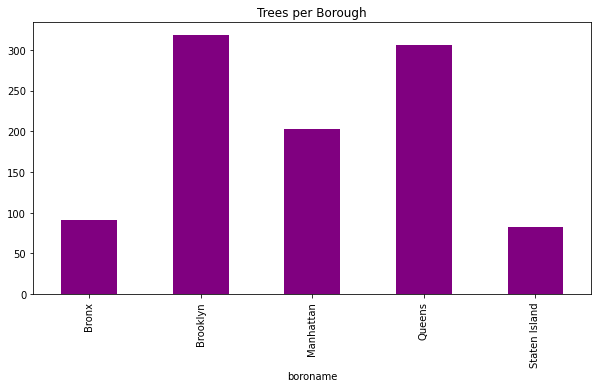

In [42]:
# Adjust plot size
plt.rcParams["figure.figsize"] = (10,5)

# Group trees data, count number of records per borough and create bar graph of trees per borough
trees.groupby('boroname').count().reset_index().plot(x = 'boroname', 
                                                     y = 'tree_id', 
                                                     kind = 'bar',
                                                     color = 'purple',
                                                     legend = False,
                                                     title = 'Trees per Borough');

### Subplots

Often, you will want to present multiple plots next to each other in a grid. You can do this using the `subplot` function.

In [43]:
trees_grp = trees.groupby('boroname')['tree_dbh'].agg(['count', 'mean']).reset_index()
trees_grp

,boroname,count,mean
0,Bronx,91,8.131868
1,Brooklyn,318,11.660377
2,Manhattan,203,8.793103
3,Queens,306,12.359477
4,Staten Island,82,10.487805


In your subplots, you can specify the following parameters:
- Number of plots per row/column
- The total width/height of the combined plots
- Whether or not you want to share the x-axis or y-axis between each plot

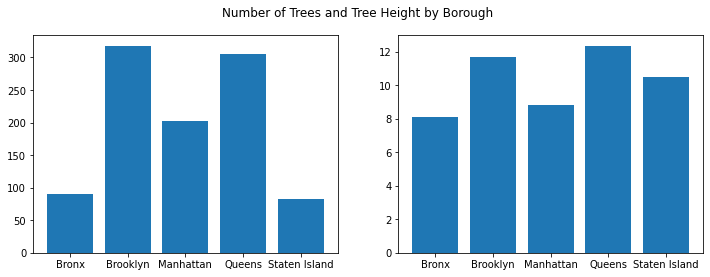

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

axs[0].bar(trees_grp['boroname'], trees_grp['count'])
axs[1].bar(trees_grp['boroname'], trees_grp['mean'])

fig.suptitle('Number of Trees and Tree Height by Borough');

### Histograms

In your data science career, you will regularly explore the _distributions_ of various data sets. The easiest graph for this purpose is the _histogram_, which displays the shape of data based on groups of values (bins) and the number of data points in each bin. You don't need to group data ahead of time to create histograms.

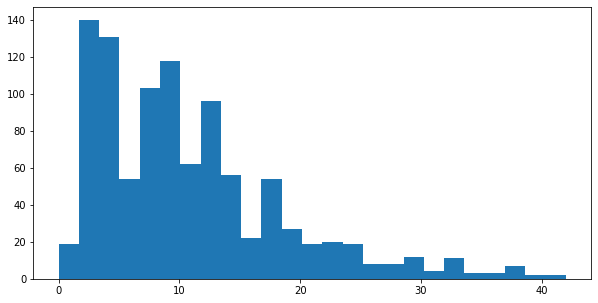

In [45]:
plt.hist(trees['tree_dbh'], bins = 25);

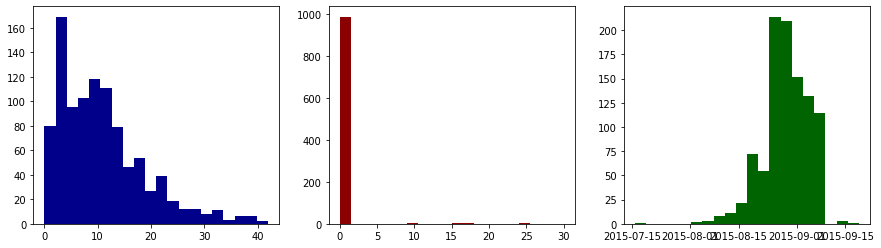

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=False, sharex = False)
axs[0].hist(trees['tree_dbh'], bins = 20, color = 'darkblue')
axs[1].hist(trees['stump_diam'], bins = 20, color = 'darkred')
axs[2].hist(trees['created_at'], bins = 20, color = 'darkgreen');

## Using Seaborn

The seaborn library is usually aliased as `sns`. We will import it as such and examine some data from the `iris` data set commonly used in machine learning.

In [47]:
import seaborn as sns

In [48]:
iris = pd.read_csv('http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv')
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Scatterplots Colored by Group

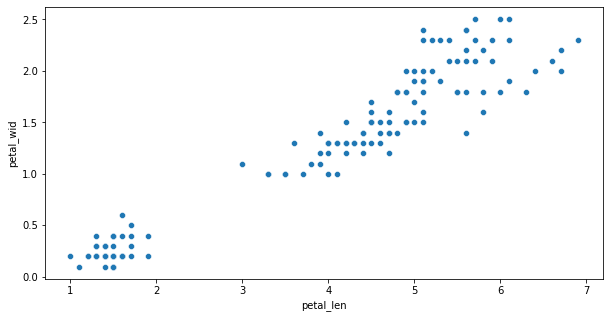

In [49]:
sns.scatterplot(iris['petal_len'], iris['petal_wid']);

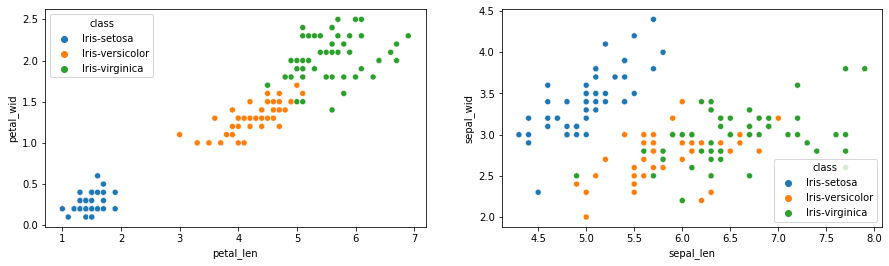

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = iris['petal_len'], y = iris['petal_wid'], hue = iris['class'], ax=axs[0])
sns.scatterplot(x = iris['sepal_len'], y = iris['sepal_wid'], hue = iris['class'], ax=axs[1]);

The same output can ultimately be achieved with `matplotlib` but with more complex syntax and a lambda function.

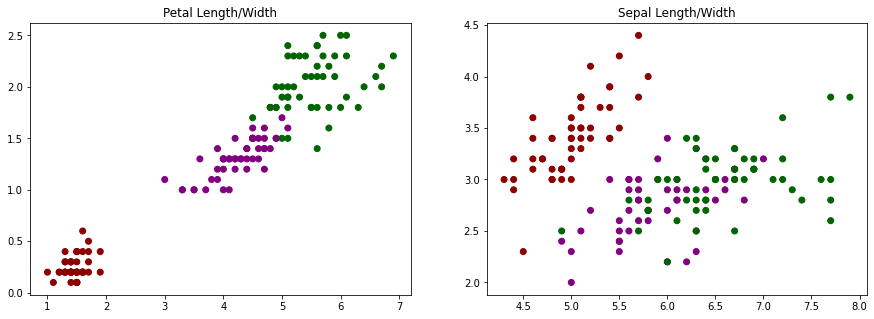

In [51]:
# Create a dictionary of colors to map to each species
colors = {'Iris-setosa': 'darkred', 'Iris-versicolor': 'purple', 'Iris-virginica': 'darkgreen'}

# Get plot parameters
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

# Set up first subplot
ax1.scatter(iris['petal_len'], 
            iris['petal_wid'], 
            c=iris['class'].apply(lambda x: colors[x]))
ax1.set_title('Petal Length/Width')

# Set up second subplot
ax2.scatter(iris['sepal_len'], 
            iris['sepal_wid'],
            c=iris['class'].apply(lambda x: colors[x]))
ax2.set_title('Sepal Length/Width');

### Line Plots

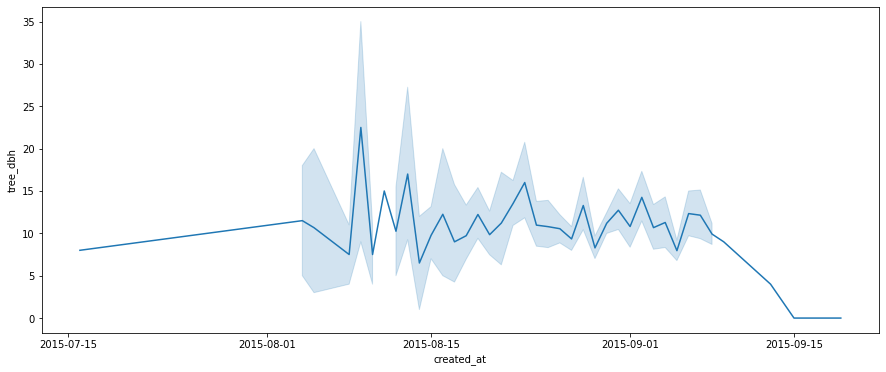

In [52]:
plt.rcParams["figure.figsize"] = (15,6)
sns.lineplot(x = trees['created_at'], y = trees['tree_dbh']);

### Visualizing Correlation Matrices

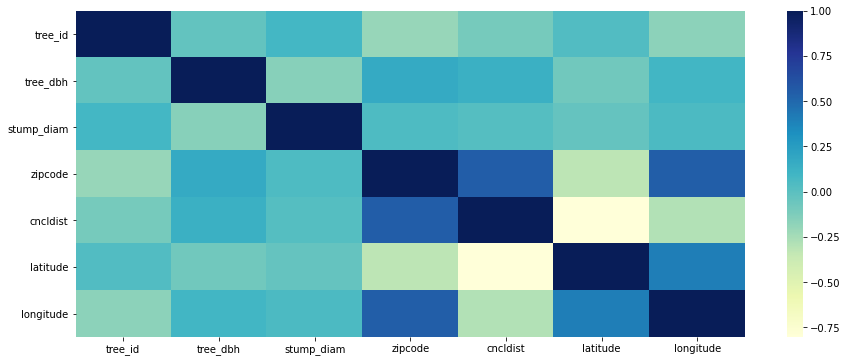

In [53]:
# Calculate correlations
corr = trees.corr()
 
# Generate a heatmap
sns.heatmap(corr, cmap="YlGnBu");